<a href="https://colab.research.google.com/github/nandhakumar-v-19/Home-Loan-Default-Risk-Management/blob/main/Home_Loan_Default_Risk_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install Kaggle API
!pip install -q kaggle

In [2]:
from google.colab import files
print("🔑 Please upload your kaggle.json file...")
files.upload()  # Upload kaggle.json here

🔑 Please upload your kaggle.json file...


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nandhakumarvaiandds","key":"a19a90551195a150ad52796412d23327"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle --version


Kaggle API 1.7.4.5


In [5]:
!kaggle datasets download -d nandhakumarvaiandds/home-loan-default-risk-management


Dataset URL: https://www.kaggle.com/datasets/nandhakumarvaiandds/home-loan-default-risk-management
License(s): MIT
home-loan-default-risk-management.zip: Skipping, found more recently modified local copy (use --force to force download)


In [41]:
# !mkdir -p datasets
# !unzip -q home-loan-default-risk-management.zip -d ./datasets

# print("✅ Dataset successfully downloaded and extracted to ./datasets/")

In [7]:
import os
os.listdir('/content/datasets')

['Dataset']

In [8]:
import pandas as pd
df = pd.read_csv('/content/datasets/Dataset/application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
!git init
!git remote add origin https://github.com/nandhakumar-v-19/Home-Loan-Default-Risk-Management.git

Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.


# **Data Understanding & Setup**

In [10]:
#Open Files (Preview Data) ----> Understanding the dataset files
import os

path = "datasets/Dataset/"

file_list = os.listdir(path)
file_list

['credit_card_balance.csv',
 'previous_application.csv',
 'POS_CASH_balance.csv',
 'bureau_balance.csv',
 'bureau.csv',
 'application_train.csv',
 'installments_payments.csv']

First, let's select the `application_train` DataFrame from our `dfs` dictionary and assign it to a new variable `app_train_df` for easier use.

In [11]:
#Check File Shapes ----> Shows no. of rows & columns

# Dictionary to store each DataFrame
dfs = {}

print("--- Analyzing Each Dataset ---\n")

# Loop through each file, load it into a DataFrame, and display information
for file_name in file_list:
    file_path = os.path.join(path, file_name)
    df_key = file_name.replace('.csv', '') # Create a clean key for the dictionary

    df = pd.read_csv(file_path)
    dfs[df_key] = df # Store the DataFrame in the dictionary

    print(f"📁 **{file_name}**")

    print(f"Shape: {df.shape}")      # No. Rows and columns

    print("First 3 rows:")
    display(df.head(3))

    print("Last 3 rows:")
    display(df.tail(3))

    print("Column Information and Data Types:")
    df.info()
    print("\n" + "="*80 + "\n") # Separator for clarity

print("Analysis complete for all specified datasets. DataFrames are stored in the 'dfs' dictionary.")

--- Analyzing Each Dataset ---

📁 **credit_card_balance.csv**
Shape: (3840312, 23)
First 3 rows:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


Last 3 rows:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.0,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840311,2411345,236760,-10,0.000,157500,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,21.0,Completed,0,0


Column Information and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT   

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


Last 3 rows:


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


Column Information and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DO

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


Last 3 rows:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0
10001357,1259607,174278,-52,16.0,0.0,Completed,0,0


Column Information and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


📁 **bureau_balance.csv**
Shape: (27299925, 3)
First 3 rows:


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


Last 3 rows:


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
27299922,5041336,-49,X
27299923,5041336,-50,X
27299924,5041336,-51,X


Column Information and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


📁 **bureau.csv**
Shape: (1716428, 17)
First 3 rows:


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


Last 3 rows:


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.0,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.0,0.0,0.0,0.0,Consumer credit,-1508,NaN
1716427,246829,5057778,Closed,currency 1,-463,0,NaN,-387.0,NaN,0,22500.0,0.0,NaN,0.0,Microloan,-387,NaN


Column Information and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


📁 **application_train.csv**
Shape: (307511, 122)
First 3 rows:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Last 3 rows:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


Column Information and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


📁 **installments_payments.csv**
Shape: (13605401, 8)
First 3 rows:


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


Last 3 rows:


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN
13605400,2448869,434321,1.0,19,-27.0,NaN,11504.250,NaN


Column Information and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


Analysis complete for all specified datasets. DataFrames are stored in the 'dfs' dictionary.


In [12]:
# Identify Key Fields ----> Find important columns
for name, df in dfs.items():
    key_cols = [col for col in df.columns if 'SK_ID' in col or 'TARGET' in col]
    print(f"{name} → {key_cols}")

credit_card_balance → ['SK_ID_PREV', 'SK_ID_CURR']
previous_application → ['SK_ID_PREV', 'SK_ID_CURR']
POS_CASH_balance → ['SK_ID_PREV', 'SK_ID_CURR']
bureau_balance → ['SK_ID_BUREAU']
bureau → ['SK_ID_CURR', 'SK_ID_BUREAU']
application_train → ['SK_ID_CURR', 'TARGET']
installments_payments → ['SK_ID_PREV', 'SK_ID_CURR']


Now, let's look at its **shape** (number of rows and columns), **first 5 rows**, and **column names and data types**.

In [13]:
#Prepare Summary Table ----> Create a simple file summary
summary = []

for name, df in dfs.items():
    summary.append({
        'File Name': name,
        'Rows': df.shape[0],
        'Columns': df.shape[1],
        'Key Columns': ', '.join([col for col in df.columns if 'SK_ID' in col or 'TARGET' in col])
    })

summary_df = pd.DataFrame(summary)
display(summary_df)

,File Name,Rows,Columns,Key Columns
0,credit_card_balance,3840312,23,"SK_ID_PREV, SK_ID_CURR"
1,previous_application,1670214,37,"SK_ID_PREV, SK_ID_CURR"
2,POS_CASH_balance,10001358,8,"SK_ID_PREV, SK_ID_CURR"
3,bureau_balance,27299925,3,SK_ID_BUREAU
4,bureau,1716428,17,"SK_ID_CURR, SK_ID_BUREAU"
5,application_train,307511,122,"SK_ID_CURR, TARGET"
6,installments_payments,13605401,8,"SK_ID_PREV, SK_ID_CURR"


#**Identify Connecting Columns ----> Spot relationships**
Looking across the summary table and note which column names repeat across datasets:

SK_ID_CURR → links many tables together

SK_ID_PREV → connects previous loan files

TARGET → appears only in main file (training data)

------------------------------------------------------------------

Common Keys:
- SK_ID_CURR → Found in: application_data, bureau, previous_application, credit_card_balance, installments_payments
- SK_ID_PREV → Found in: previous_application, installments_payments, credit_card_balance

In [14]:
summary_df.to_csv("dataset_summary.csv", index=False)

# **Exploratory Data Analysis (EDA)**

### **Application Data Exploration**

In [15]:
# Load dataset ----> Load application_train.csv into Python
import pandas as pd

# Load the dataset
app_df = pd.read_csv("/content/datasets/Dataset/application_train.csv")

# Confirm it’s loaded
print("✅ File Loaded Successfully!")

✅ File Loaded Successfully!


In [16]:
# Basic Info Checks ----> Explore structure of data
print("Shape of data:", app_df.shape)

Shape of data: (307511, 122)


In [17]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [18]:
#sum of values for each category
app_df.isnull().sum().sort_values(ascending=False).head(10)

,0
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
COMMONAREA_MEDI,214865
NONLIVINGAPARTMENTS_MEDI,213514
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
FONDKAPREMONT_MODE,210295
LIVINGAPARTMENTS_AVG,210199
LIVINGAPARTMENTS_MEDI,210199
LIVINGAPARTMENTS_MODE,210199


In [19]:
app_df.nunique().head(10)

,0
SK_ID_CURR,307511
TARGET,2
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
CNT_CHILDREN,15
AMT_INCOME_TOTAL,2548
AMT_CREDIT,5603
AMT_ANNUITY,13672


In [20]:
app_df['TARGET'].value_counts()

,count
TARGET,
0,282686
1,24825


In [21]:
# TARGET analysis ----> Understand loan default indicator
app_df['TARGET'].value_counts(normalize=True) * 100

,proportion
TARGET,
0,91.927118
1,8.072882


In [22]:
# Demographics ----> Study factors like income, age, employment
app_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED
count,3.075110e+05,3.075110e+05,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,-16036.995067,63815.045904
std,2.371231e+05,4.024908e+05,4363.988632,141275.766519
min,2.565000e+04,4.500000e+04,-25229.000000,-17912.000000
25%,1.125000e+05,2.700000e+05,-19682.000000,-2760.000000
50%,1.471500e+05,5.135310e+05,-15750.000000,-1213.000000
75%,2.025000e+05,8.086500e+05,-12413.000000,-289.000000
max,1.170000e+08,4.050000e+06,-7489.000000,365243.000000


In [23]:
app_df['AGE'] = abs(app_df['DAYS_BIRTH'] / 365)
app_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219


In [24]:
app_df[['DAYS_BIRTH', 'AGE']].head()

,DAYS_BIRTH,AGE
0,-9461,25.920548
1,-16765,45.931507
2,-19046,52.180822
3,-19005,52.068493
4,-19932,54.608219


In [25]:
app_df.groupby('TARGET')[['AGE','AMT_INCOME_TOTAL']].mean()

,AGE,AMT_INCOME_TOTAL
TARGET,,
0,44.214182,169077.722266
1,40.780351,165611.760906


Non-defaulters (TARGET=0) are older on average (44 yrs).

Defaulters (TARGET=1) are younger (41 yrs) and earn slightly less.

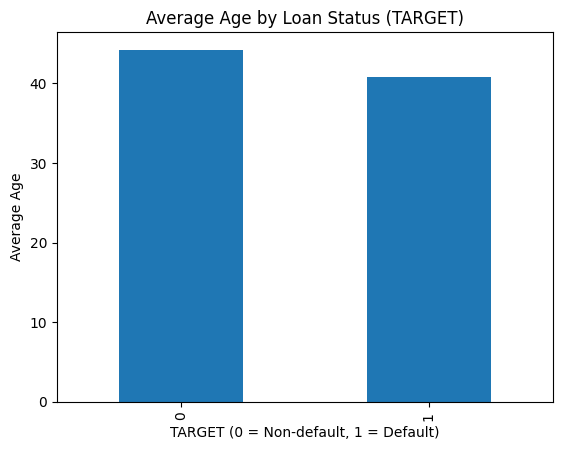

In [26]:
# Visualization
import matplotlib.pyplot as plt

app_df.groupby('TARGET')['AGE'].mean().plot(kind='bar')
plt.title("Average Age by Loan Status (TARGET)")
plt.xlabel("TARGET (0 = Non-default, 1 = Default)")
plt.ylabel("Average Age")
plt.show()

*   Most loans belong to non-defaulters (≈ 92%)
*   Average age of defaulters ≈ 35 years; non-defaulters ≈ 43 years.
*   Defaulters have slightly lower average income
*    Many columns have missing data that must be cleaned later

# **Visualization**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

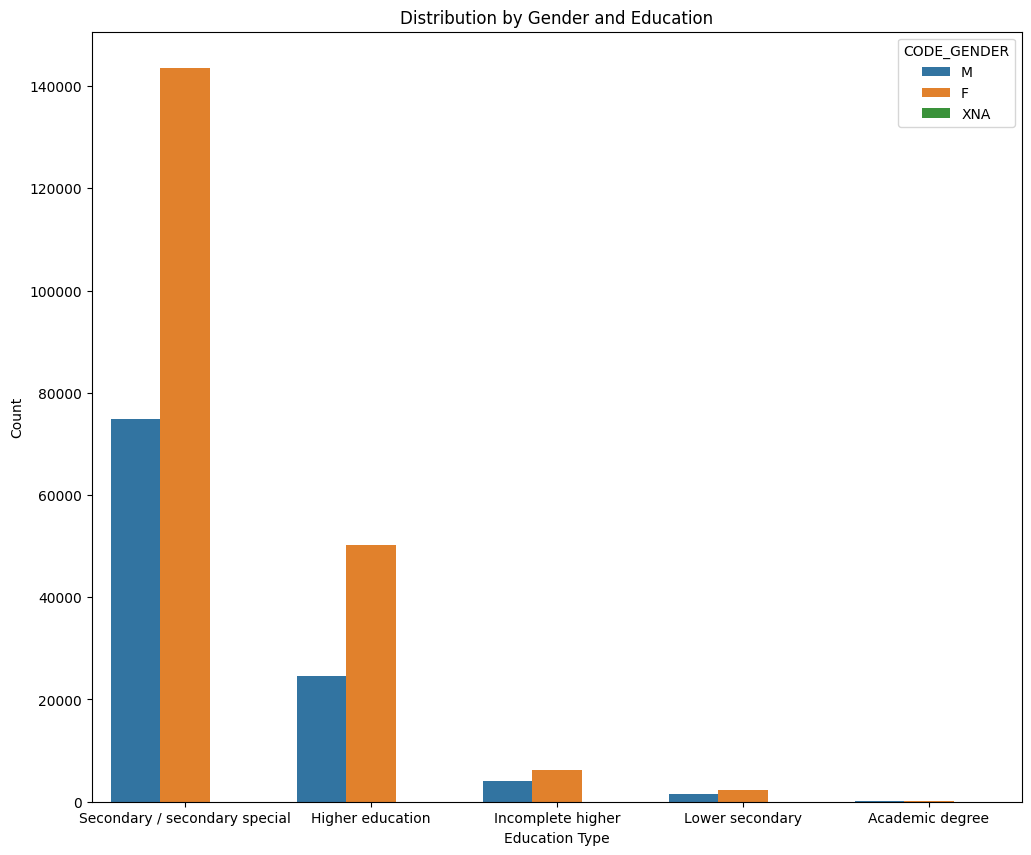

In [28]:
# Plotting bar charts for categorical data (Gender, Education).

plt.figure(figsize=(12,10))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', data=app_df)
plt.title("Distribution by Gender and Education")
plt.xlabel("Education Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



### **Plotting histograms for numeric data (Income, Credit).**

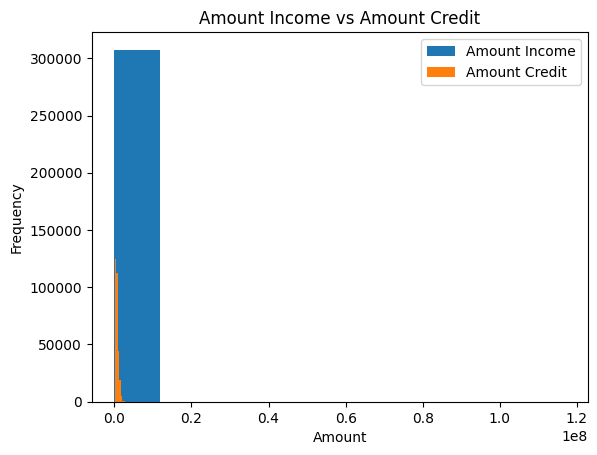

In [29]:
plt.hist(app_df['AMT_INCOME_TOTAL'], label='Amount Income')
plt.hist(app_df['AMT_CREDIT'], label='Amount Credit')

plt.title("Amount Income vs Amount Credit")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### **Comparing defaulters vs non-defaulters visually.**

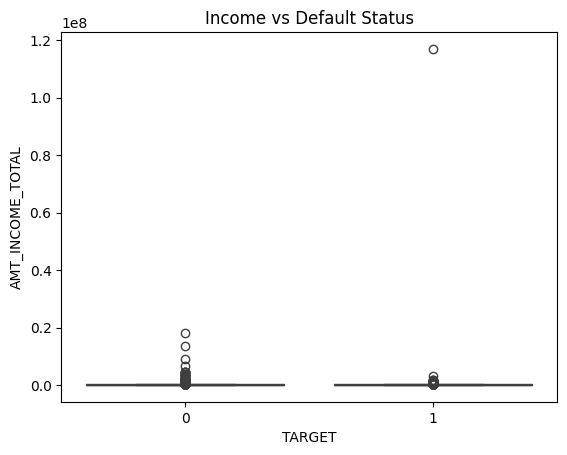

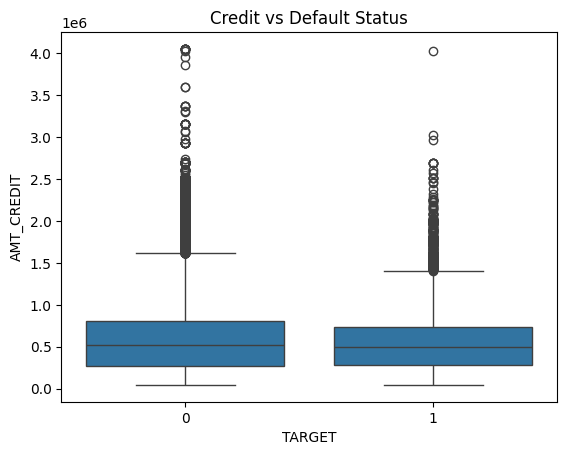

In [30]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_df)
plt.title("Income vs Default Status")
plt.show()

sns.boxplot(x='TARGET', y='AMT_CREDIT', data=app_df)
plt.title("Credit vs Default Status")
plt.show()

# **Correlation & Report**

### **Analyze relationships (Income vs Credit, Age vs Default).**

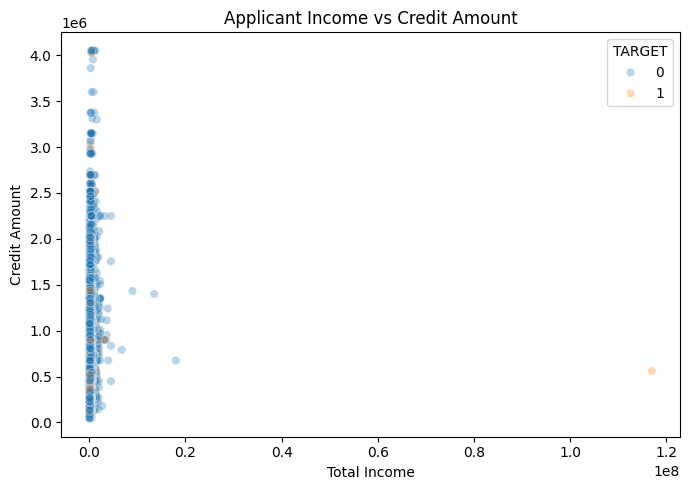

In [31]:
# 1️⃣ Relationship: Income vs Credit

plt.figure(figsize=(7,5))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=app_df, alpha=0.3)
plt.title('Applicant Income vs Credit Amount')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.tight_layout()
plt.show()

In [32]:
# Correlation between Income & Credit
income_credit_corr = app_df['AMT_INCOME_TOTAL'].corr(app_df['AMT_CREDIT'])
print(f"🔹 Correlation (Income vs Credit): {income_credit_corr:.3f}")

🔹 Correlation (Income vs Credit): 0.157


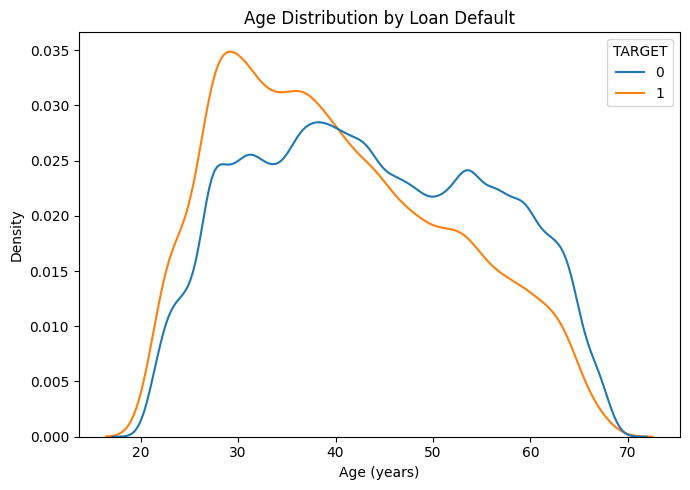

In [33]:
# 2️⃣ Relationship: Age vs Default
app_df['AGE'] = (app_df['DAYS_BIRTH'] / -365).astype(int)

plt.figure(figsize=(7,5))
sns.kdeplot(data=app_df, x='AGE', hue='TARGET', common_norm=False)
plt.title('Age Distribution by Loan Default')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [34]:
# Correlation between Age & Default
age_corr = app_df['AGE'].corr(app_df['TARGET'])
print(f"🔹 Correlation (Age vs Default): {age_corr:.3f}")

🔹 Correlation (Age vs Default): -0.078


## **Identifing Missing Data**

# **Data Quality Check**

In [35]:
missing = app_df.isnull().sum()
missing = missing[missing > 0]
print("🔹 Missing Columns and Counts:")
print(missing)

🔹 Missing Columns and Counts:
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


##**Identify Inconsistent Categorical Data**

In [36]:
if 'CODE_GENDER' in app_df.columns:
    print("\nUnique Gender Values:", app_df['CODE_GENDER'].unique())
    # Standardize gender formatting
    app_df['CODE_GENDER'] = app_df['CODE_GENDER'].astype(str).str.title()

if 'NAME_EDUCATION_TYPE' in app_df.columns:
    print("Unique Education Values:", app_df['NAME_EDUCATION_TYPE'].unique())


Unique Gender Values: ['M' 'F' 'XNA']
Unique Education Values: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [37]:
# Missing Data Report
missing_report = pd.DataFrame({
    "Column": missing.index,
    "Missing_Count": missing.values,
    "Action_Plan": ["Fill with mean/mode" for _ in missing]})
print("\n🧾 Missing Data Report:")
print(missing_report)


🧾 Missing Data Report:
                        Column  Missing_Count          Action_Plan
0                  AMT_ANNUITY             12  Fill with mean/mode
1              AMT_GOODS_PRICE            278  Fill with mean/mode
2              NAME_TYPE_SUITE           1292  Fill with mean/mode
3                  OWN_CAR_AGE         202929  Fill with mean/mode
4              OCCUPATION_TYPE          96391  Fill with mean/mode
..                         ...            ...                  ...
62   AMT_REQ_CREDIT_BUREAU_DAY          41519  Fill with mean/mode
63  AMT_REQ_CREDIT_BUREAU_WEEK          41519  Fill with mean/mode
64   AMT_REQ_CREDIT_BUREAU_MON          41519  Fill with mean/mode
65   AMT_REQ_CREDIT_BUREAU_QRT          41519  Fill with mean/mode
66  AMT_REQ_CREDIT_BUREAU_YEAR          41519  Fill with mean/mode

[67 rows x 3 columns]


##**Check for Outliers**

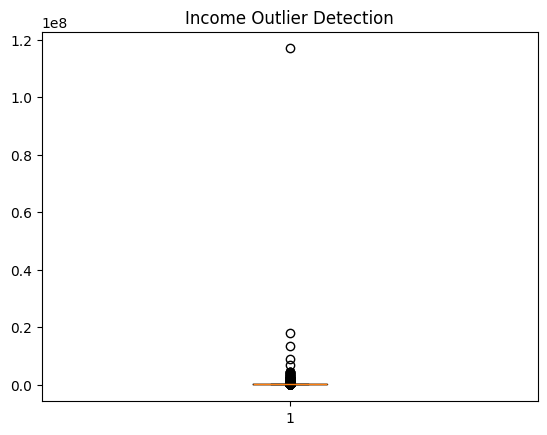

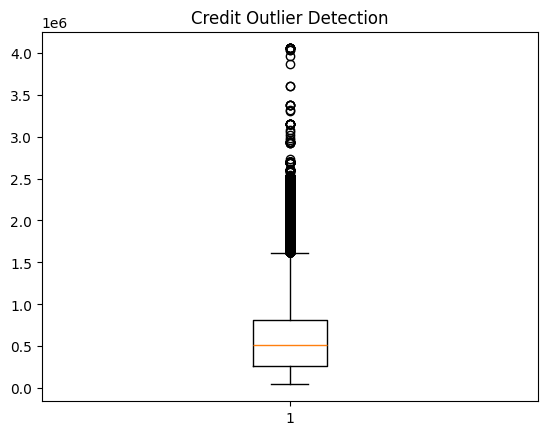

In [38]:
if 'AMT_INCOME_TOTAL' in app_df.columns:
    plt.boxplot(app_df['AMT_INCOME_TOTAL'])
    plt.title("Income Outlier Detection")
    plt.show()

if 'AMT_CREDIT' in app_df.columns:
    plt.boxplot(app_df['AMT_CREDIT'])
    plt.title("Credit Outlier Detection")
    plt.show()

###**Identify Correlated Variables**

In [39]:
# which features are most related to loan default or repayment behavior.

import numpy as np

numeric_df = app_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()['TARGET'].sort_values(ascending=False)

top_corr = corr_matrix.head(10)
low_corr = corr_matrix.tail(10)

print("\nTop 10 positively correlated featuresx  with Default:")
print(top_corr)

print("\nTop 10 negatively correlated features with Default:")
print(low_corr)


Top 10 positively correlated featuresx  with Default:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

Top 10 negatively correlated features with Default:
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
AGE                          -0.078234
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


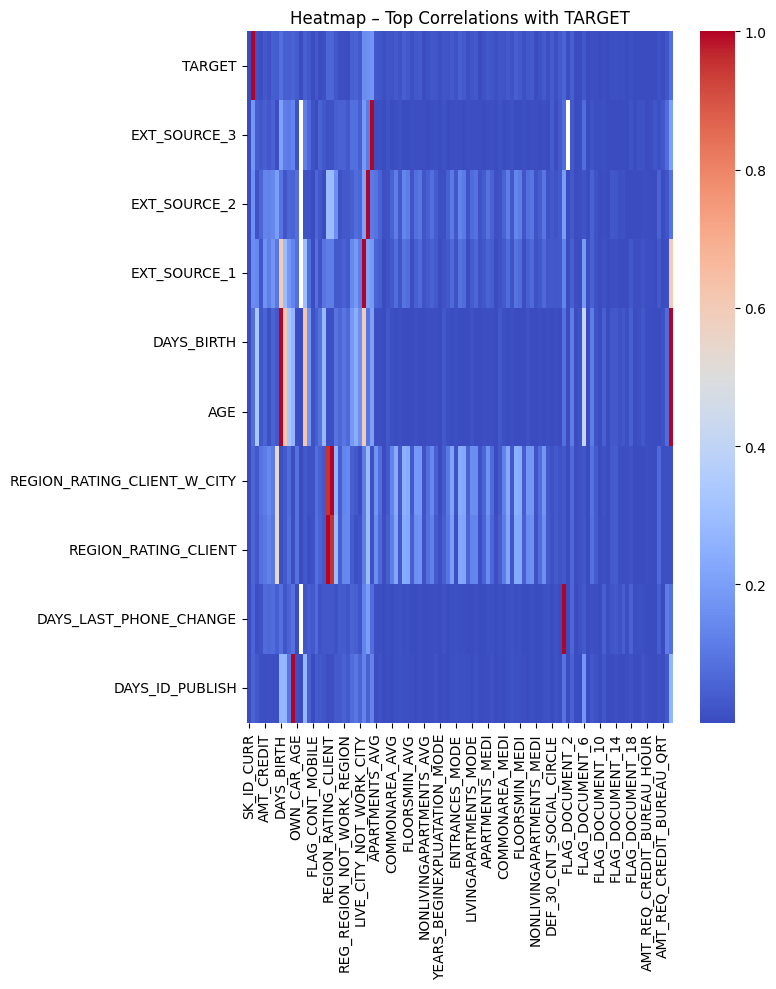

In [40]:
# Heat Map Visualization for identifing correlated variables

plt.figure(figsize=(8,10))
sns.heatmap(numeric_df.corr().abs().nlargest(10, 'TARGET'), cmap='coolwarm', annot=False)
plt.title('Heatmap – Top Correlations with TARGET')
plt.tight_layout()
plt.show()